In [234]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#! mamba install seaborn=0.9.0-y
#!  mamba install matplotlib=3.4.3-y
#!  mamba install statsmodels=0.12.0-y

In [235]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [236]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [237]:
from js import fetch
import io

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(boston_url)
boston_url_load = io.BytesIO((await resp.arrayBuffer()).to_py())

In [238]:
boston_df=pd.read_csv(boston_url_load)

In [239]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? 

# H0: medians of MEDV on each CHAS=1 and CHAS=0 are the same
# H1: medians of MEDV on each CHAS=1 and CHAS=0 are not the same

import scipy.stats
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [240]:
# Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is NO significance difference in median value of houses bounded by Charles river and not

In [241]:
# Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

# H0: There is no difference in median values of houses for occupied units built prior to 1940.
# H1: There is a difference in median values of houses for occupied units built prior to 1940.

boston_df.loc[(boston_df.AGE > 81), 'age_span'] = 'before 1940'
boston_df.loc[(boston_df.AGE <= 81), 'age_span'] = 'after 1940'

scipy.stats.levene(boston_df[boston_df.age_span =='before 1940']['MEDV'],
                  boston_df[boston_df.age_span =='after 1940']['MEDV'],
                  center='mean')

LeveneResult(statistic=1.587082228964923, pvalue=0.2083265383143275)

In [242]:
# Conclusion: Since the p-value is greater than 0.05, we fail to reject the null hypothesis that there is a statistical difference in median values of houses for each proportion of owner occupied units built prior to 1940.

In [243]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

# H0: There is no relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.
# H1: There is a relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.

In [244]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.7636514469209189, 7.913361061211254e-98)

In [245]:
 # Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [246]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

# H0: Weighted distances to five Boston employment centres are NOT related to median value
# H1: Weighted distances to five Boston employment centres are related to median value

In [247]:
import statsmodels.api as sm

X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        10:02:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [248]:
# The coef DIS of 1.0916 indicates that an additional weighted distance to the five empolyment centers in boston increases of 1.0916 the median value of owner occupied homes

In [249]:
cols = ['RM', 'AGE', 'TAX', 'LSTAT', 'MEDV'] 
boston_df[cols].head()

,RM,AGE,TAX,LSTAT,MEDV
0,6.575,65.2,296.0,4.98,24.0
1,6.421,78.9,242.0,9.14,21.6
2,7.185,61.1,242.0,4.03,34.7
3,6.998,45.8,222.0,2.94,33.4
4,7.147,54.2,222.0,5.33,36.2


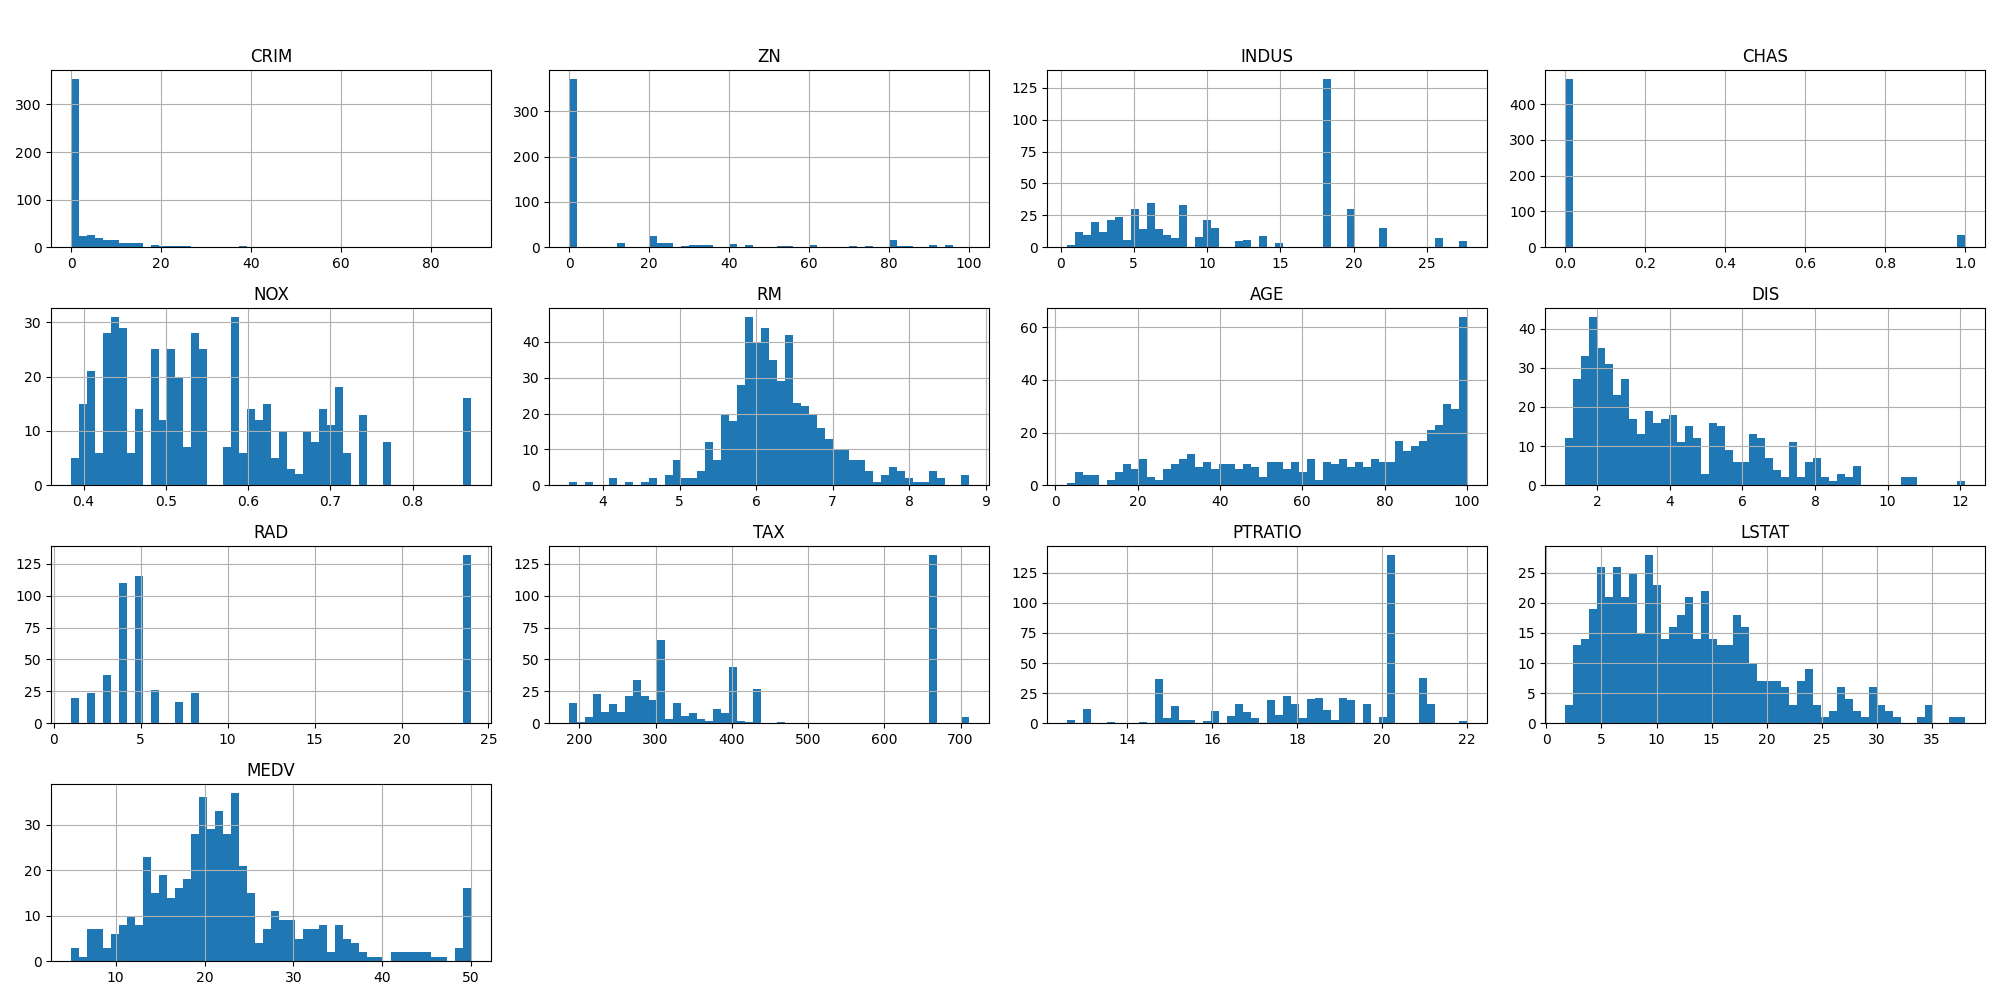

<Figure size 2000x1000 with 0 Axes>

In [250]:
boston_df = boston_df.drop(columns="Unnamed: 0")
boston_df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distributions', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

<ipython-input-251-8525a3986b5f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=boston_df.CHAS,bins=10, kde=False)


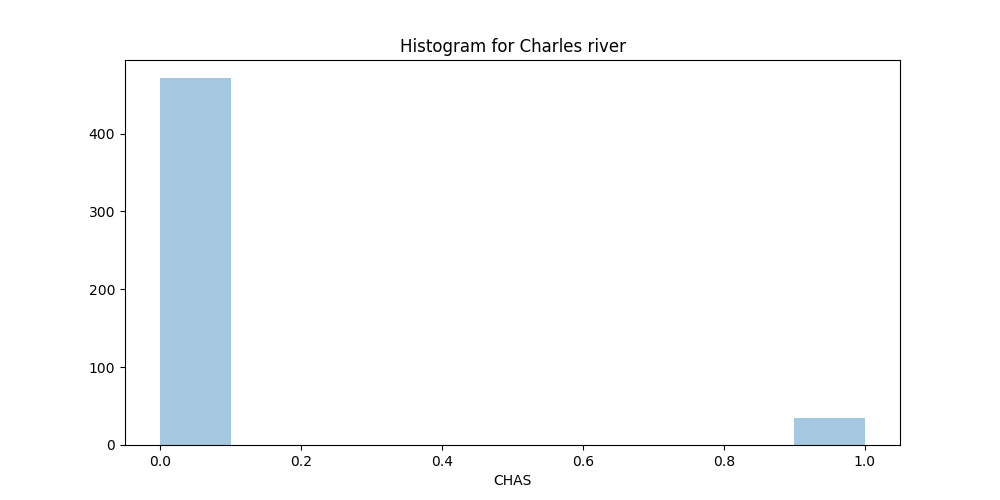

<Figure size 1000x500 with 0 Axes>

In [251]:
plt.figure(figsize=(10,5))
sns.distplot(a=boston_df.CHAS,bins=10, kde=False)
plt.title("Histogram for Charles river")
plt.show()

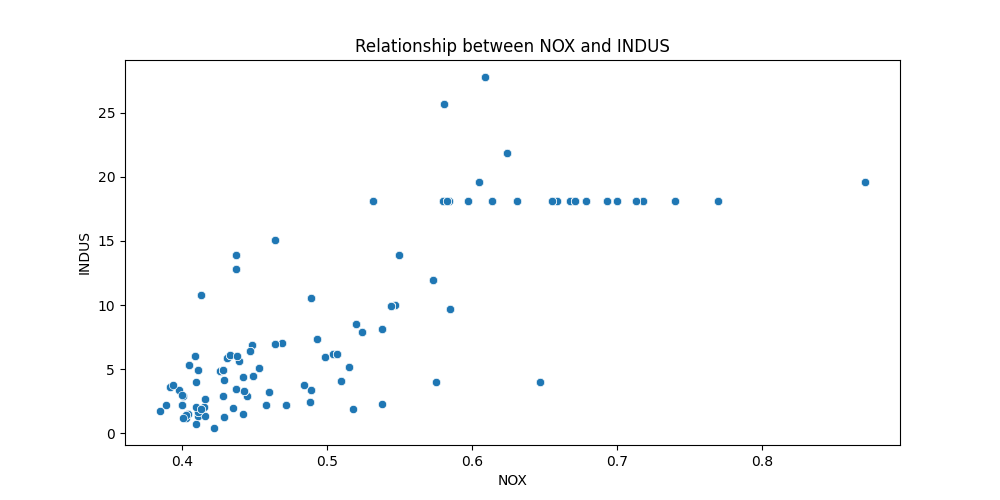

<Figure size 1000x500 with 0 Axes>

In [252]:
#Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
plt.figure(figsize=(10,5))
sns.scatterplot(x=boston_df.NOX, y=boston_df.INDUS, data=boston_df)
plt.title("Relationship between NOX and INDUS")
plt.show()

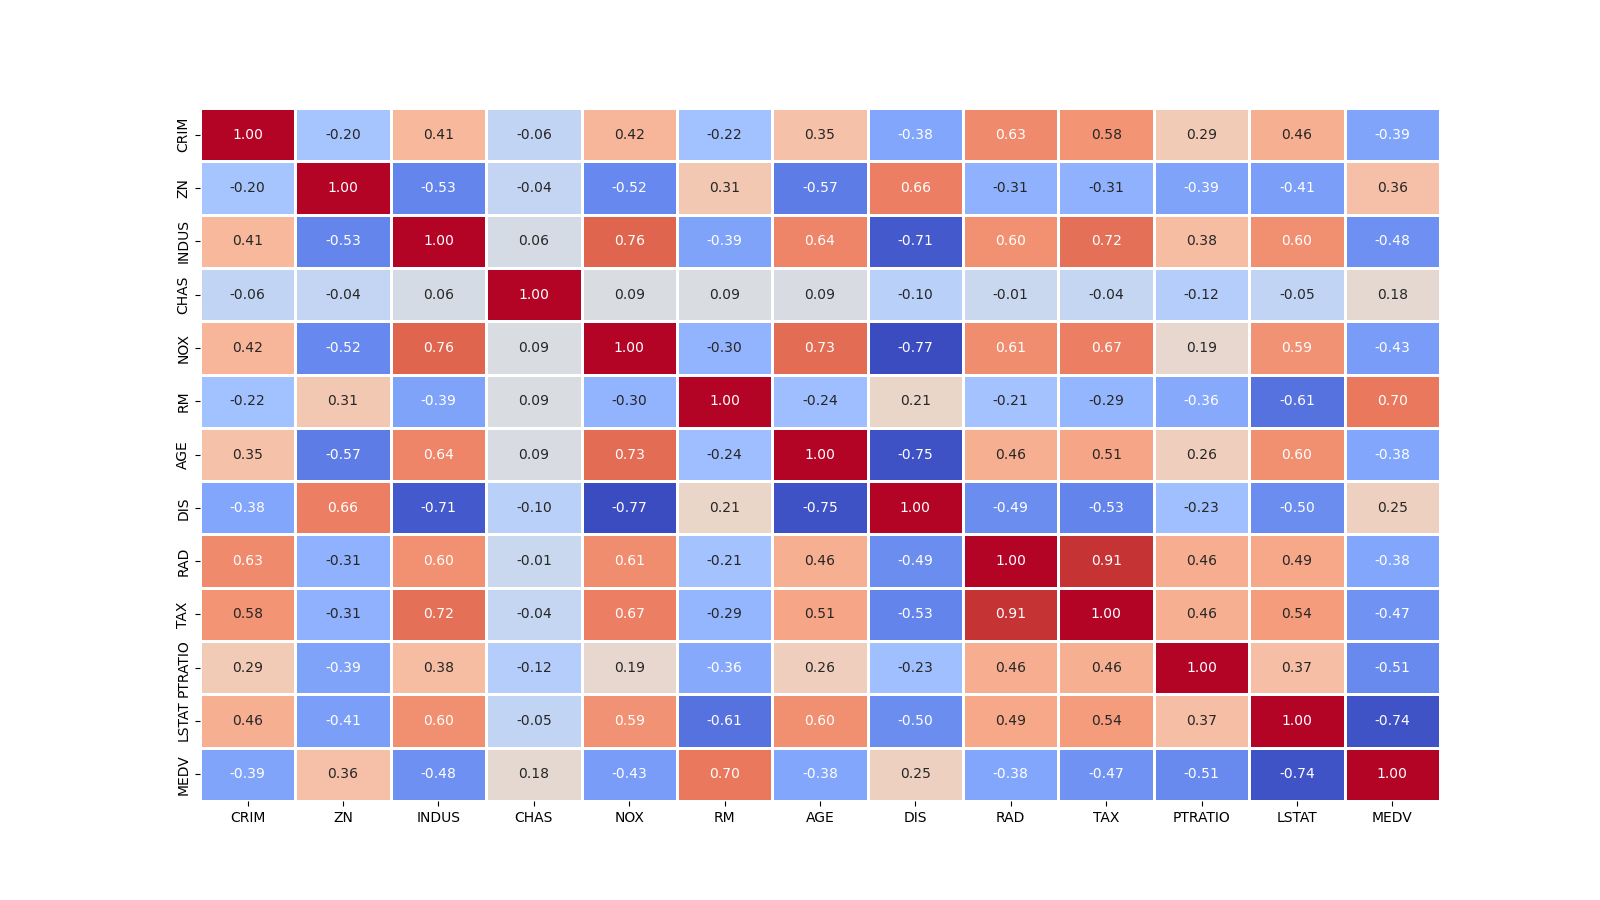

<Figure size 1600x900 with 0 Axes>

In [253]:
boston_df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(boston_df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2, cbar=False)
plt.show()